In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\Internship 4 week\Week_1\project_week2\crop_yield_50000.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (50000, 10)


<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\harsh\AppData\Local\Temp\ipykernel_11064\14884495.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv("D:\Internship 4 week\Week_1\project_week2\crop_yield_50000.csv")


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,North,Loam,Maize,269.628359,33.568049,True,True,Sunny,100.778743,5.015345
1,South,Silt,Barley,277.096946,31.503174,False,True,Rainy,90.869031,2.850527
2,South,Chalky,Maize,872.538244,34.665578,False,False,Sunny,84.610447,5.698175
3,North,Loam,Wheat,475.905625,28.462172,False,True,Sunny,97.719303,3.840846
4,North,Clay,Rice,381.067981,19.256107,True,False,Cloudy,68.468178,3.166763


In [3]:
cat_cols = ["Region", "Soil_Type", "Weather_Condition", "Crop"]
encoders = {}
for col in cat_cols:
	enc = LabelEncoder()
	df[col] = enc.fit_transform(df[col])
	encoders[col] = enc

In [4]:

X = df.drop("Crop", axis=1)
y = df["Crop"]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.3652

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.42      0.41      1666
           1       0.38      0.40      0.39      1668
           2       0.39      0.41      0.40      1701
           3       0.39      0.39      0.39      1662
           4       0.39      0.38      0.39      1658
           5       0.22      0.18      0.20      1645

    accuracy                           0.37     10000
   macro avg       0.36      0.36      0.36     10000
weighted avg       0.36      0.37      0.36     10000



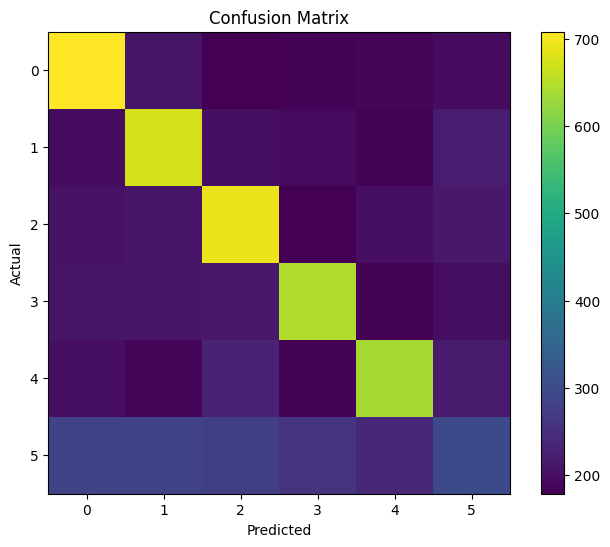

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()